#### No need to run the following cell if you have run the following code in your terminal:

```
pip install -r final-project/requirements.txt
```


In [29]:
pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 26.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import pandas as pd

# Cleaning

data cleaning and preprocessing: This will involve converting data into a structured format for analysis and selecting data within pre-determined scope.

To get consistent results as the report, please use files in the `data/raw` folder: `group1_raw.csv`, `group2_raw.csv`, and `group3_raw.csv` when running the following cells.

In [8]:
g1_file_df = pd.read_csv('../data/raw/group1_raw.csv')
g2_file_df = pd.concat([pd.read_csv('../data/raw/group2_raw.csv'),pd.read_csv('../data/raw/group3_raw.csv')]) # combining group 2 and 3 = 140 songs
len(g2_file_df)

140

In [9]:
# extract album column: name, uri, release_date

def fill_in_album_attribute(df):
  album_attribute = ('name','uri','release_date')

  # add column attributes columns
  n=2
  for att in album_attribute:
    df.insert(loc=n, column=f'album_{att}', value=['' for i in range(df.shape[0])])
    n+=1

  # fill in corresponding album attributes
  for att in album_attribute:
    temp_list = []
    for i,j in enumerate(df['album']):
      j = eval(j)
      temp_list.append(j[att])
    df[f'album_{att}']=temp_list
  df['album_release_date']=pd.to_datetime(df['album_release_date'], format='%Y-%m-%d')

In [10]:
fill_in_album_attribute(g1_file_df)
fill_in_album_attribute(g2_file_df)

In [11]:
g1_file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          102 non-null    int64         
 1   album               102 non-null    object        
 2   album_name          102 non-null    object        
 3   album_uri           102 non-null    object        
 4   album_release_date  102 non-null    datetime64[ns]
 5   artists             102 non-null    object        
 6   available_markets   102 non-null    object        
 7   disc_number         102 non-null    int64         
 8   duration_ms_x       102 non-null    int64         
 9   episode             102 non-null    bool          
 10  explicit            102 non-null    bool          
 11  external_ids        102 non-null    object        
 12  external_urls       102 non-null    object        
 13  href                102 non-null    object        

In [12]:
def extract_columns(df):
  columns_extracted = ['uri','popularity','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','duration_ms_y','liveness','tempo','time_signature','valence','album_release_date']
  return df[columns_extracted].set_index('uri')

In [13]:
g1_file_selected_df = extract_columns(g1_file_df)
g1_file_selected_df.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,duration_ms_y,liveness,tempo,time_signature,valence,album_release_date
uri,,,,,,,,,,,,,,,
spotify:track:0y60itmpH0aPKsFiGxmtnh,82,0.764,0.705,3,-5.279,0,0.0278,0.0371,0.000019,196520,0.0943,101.003,4,0.672,2015-01-11
spotify:track:3EaJDYHA0KnX88JvDhL9oa,90,0.603,0.784,6,-4.023,1,0.0620,0.4460,0.000008,173104,0.1190,172.041,4,0.769,2017-02-20
spotify:track:7B3z0ySL9Rr0XvZEAjWZzM,82,0.744,0.619,0,-9.805,1,0.0390,0.5980,0.003720,188387,0.2310,112.997,4,0.641,2019-08-02
spotify:track:0uI7yAKUf52Cn7y3sYyjiX,74,0.815,0.518,7,-6.594,0,0.0897,0.2230,0.000000,177667,0.1040,151.891,4,0.877,2018-10-16
spotify:track:4nK5YrxbMGZstTLbvj6Gxw,70,0.863,0.631,7,-4.689,1,0.0534,0.3050,0.000030,223480,0.1230,128.977,4,0.817,2019-11-15


In [14]:
min_release = g1_file_selected_df.album_release_date.min()
max_release = g1_file_selected_df.album_release_date.max()

In [15]:
min_release

Timestamp('2013-01-01 00:00:00')

**group 1 insights / notes: **
popularity: minimum - 39, maximum - 90; min release date: 2013-01-01

In [16]:
g2_file_selected_df = extract_columns(g2_file_df)
g2_file_selected_df = g2_file_selected_df.query('popularity<39 and album_release_date > @min_release')

In [17]:
g1_file_selected_df.to_csv('../data/processed/new_group1_processed.csv')
g2_file_selected_df.to_csv('../data/processed/new_group2_processed.csv')

# Analysis
run_analysis.py

You will analyze the scraped data to gain insights or answer
specific questions. You should perform statistical analyses, generate descriptive
statistics, using libraries such as NumPy and Pandas (or any other library you wish).

In [18]:
# load processed data into dataframes for analysis
g1_analysis = pd.read_csv('../data/processed/group1_processed.csv').set_index('uri')
g2_analysis = pd.read_csv('../data/processed/group2_processed.csv').set_index('uri')

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Exploratory (describe, correlation) for both groups:

In [20]:
g1_analysis.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,duration_ms_y,liveness,tempo,time_signature,valence
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,68.676471,0.656314,0.548853,5.294118,-8.032559,0.754902,0.071755,0.356279,0.096231,189842.725490,0.184143,116.810922,3.941176,0.532195
std,10.927449,0.147381,0.152860,3.462925,3.031738,0.432270,0.079777,0.254131,0.230963,46809.559434,0.118614,27.023569,0.309056,0.217097
min,40.000000,0.174000,0.129000,0.000000,-20.149000,0.000000,0.025700,0.000176,0.000000,93871.000000,0.054800,65.832000,3.000000,0.039900
25%,61.250000,0.562000,0.425250,2.000000,-9.693250,1.000000,0.031225,0.126750,0.000004,164776.000000,0.104000,96.921000,4.000000,0.368500
50%,68.500000,0.654500,0.537500,6.000000,-7.580500,1.000000,0.042050,0.318500,0.000412,190987.000000,0.128000,113.461000,4.000000,0.519500
75%,76.750000,0.765750,0.676250,8.000000,-6.115500,1.000000,0.069100,0.541000,0.011508,212528.750000,0.232500,131.415750,4.000000,0.698750
max,90.000000,0.930000,0.865000,11.000000,-1.148000,1.000000,0.567000,0.947000,0.911000,318147.000000,0.605000,210.164000,5.000000,0.935000


In [21]:
ignore_columns = ['album_release_date','group']
g1_analysis[[col for col in g1_analysis.columns if col not in ignore_columns]].corr()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,duration_ms_y,liveness,tempo,time_signature,valence
popularity,1.000000,-0.329377,0.041854,0.014575,-0.096018,-0.060971,-0.044006,-0.000419,0.161983,0.000502,-0.025141,0.349280,-0.146414,-0.213580
danceability,-0.329377,1.000000,-0.036813,-0.239225,0.174541,-0.038100,0.094880,-0.021409,-0.071253,-0.338857,-0.184311,-0.193089,0.164306,0.584826
energy,0.041854,-0.036813,1.000000,0.099402,0.724696,0.040206,0.156710,-0.433034,-0.066443,0.098082,0.113518,0.082530,0.207927,0.301668
key,0.014575,-0.239225,0.099402,1.000000,-0.008000,-0.196093,0.054789,-0.057221,0.071710,0.229552,0.205302,0.176210,0.025577,-0.075881
loudness,-0.096018,0.174541,0.724696,-0.008000,1.000000,0.196754,0.124409,-0.281130,-0.134342,-0.003765,0.070913,-0.072572,0.185457,0.394920
mode,-0.060971,-0.038100,0.040206,-0.196093,0.196754,1.000000,-0.096965,0.145398,0.081565,-0.035390,0.131596,-0.093368,0.113347,0.022776
speechiness,-0.044006,0.094880,0.156710,0.054789,0.124409,-0.096965,1.000000,0.059631,-0.108767,-0.052582,-0.073109,0.160173,0.065870,0.198007
acousticness,-0.000419,-0.021409,-0.433034,-0.057221,-0.281130,0.145398,0.059631,1.000000,0.062896,0.022215,0.066235,-0.034066,-0.204000,-0.165882
instrumentalness,0.161983,-0.071253,-0.066443,0.071710,-0.134342,0.081565,-0.108767,0.062896,1.000000,0.119699,0.104604,-0.019238,-0.066907,-0.193956
duration_ms_y,0.000502,-0.338857,0.098082,0.229552,-0.003765,-0.035390,-0.052582,0.022215,0.119699,1.000000,0.096768,0.139109,0.211233,-0.213531


In [22]:
g2_analysis.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,duration_ms_y,liveness,tempo,time_signature,valence
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,16.373737,0.636485,0.630232,5.191919,-7.954444,0.626263,0.053137,0.262974,0.175919,207927.040404,0.196703,123.243182,4.000000,0.548349
std,11.637015,0.134437,0.150497,3.474915,2.278502,0.486257,0.039471,0.247839,0.276768,42755.739501,0.126061,24.963605,0.142857,0.241310
min,0.000000,0.271000,0.297000,0.000000,-14.004000,0.000000,0.022700,0.000034,0.000000,124120.000000,0.043100,74.878000,3.000000,0.058700
25%,5.000000,0.545500,0.522000,2.000000,-9.441000,0.000000,0.032250,0.044700,0.000064,179903.500000,0.100000,107.505000,4.000000,0.356500
50%,16.000000,0.655000,0.618000,5.000000,-7.484000,1.000000,0.039300,0.207000,0.012100,199853.000000,0.144000,120.108000,4.000000,0.556000
75%,26.000000,0.730000,0.752000,8.000000,-6.367500,1.000000,0.058600,0.446000,0.220500,231646.500000,0.299000,136.019000,4.000000,0.717500
max,38.000000,0.896000,0.922000,11.000000,-2.967000,1.000000,0.314000,0.848000,0.957000,355135.000000,0.531000,203.346000,5.000000,0.977000


In [23]:
ignore_columns = ['album_release_date','group']
g2_analysis[[col for col in g2_analysis.columns if col not in ignore_columns]].corr()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,duration_ms_y,liveness,tempo,time_signature,valence
popularity,1.000000,0.063784,-0.016953,8.778924e-02,-0.046228,0.143954,0.023391,0.091543,-0.105153,-0.059892,-0.046375,-0.007049,-1.964176e-01,0.151566
danceability,0.063784,1.000000,-0.121306,1.873659e-02,-0.093644,0.028868,0.071784,-0.014348,0.003728,-0.033308,-0.101654,-0.249600,9.032371e-03,0.563598
energy,-0.016953,-0.121306,1.000000,-2.030060e-02,0.620348,0.135338,0.064525,-0.402673,0.111177,-0.009336,0.239143,-0.018955,2.278170e-02,0.267806
key,0.087789,0.018737,-0.020301,1.000000e+00,0.070766,-0.240949,-0.159581,0.063916,-0.051504,0.046444,-0.075866,-0.100979,1.414913e-16,0.091978
loudness,-0.046228,-0.093644,0.620348,7.076643e-02,1.000000,0.069015,0.139831,-0.247867,-0.178641,-0.055608,0.265626,0.008954,-1.084672e-02,0.138083
mode,0.143954,0.028868,0.135338,-2.409492e-01,0.069015,1.000000,0.136520,0.029254,0.032558,-0.195103,-0.101392,0.076300,-1.468946e-01,0.109750
speechiness,0.023391,0.071784,0.064525,-1.595814e-01,0.139831,0.136520,1.000000,0.030309,-0.167348,-0.163134,-0.086636,-0.034346,9.826413e-02,0.093442
acousticness,0.091543,-0.014348,-0.402673,6.391641e-02,-0.247867,0.029254,0.030309,1.000000,-0.082567,-0.165412,-0.172628,0.034958,1.371861e-01,-0.066305
instrumentalness,-0.105153,0.003728,0.111177,-5.150357e-02,-0.178641,0.032558,-0.167348,-0.082567,1.000000,0.106098,-0.054084,-0.001358,-6.348795e-06,0.020458
duration_ms_y,-0.059892,-0.033308,-0.009336,4.644410e-02,-0.055608,-0.195103,-0.163134,-0.165412,0.106098,1.000000,0.060835,0.008231,-1.579638e-01,-0.096114


### MANOVA & ANOVA

In [24]:
def aggregate(df1, df2):
  df1['group'] = 1
  df2['group'] = 2
  return pd.concat([df1, df2])

In [25]:
agg_analysis = aggregate(g1_analysis,g2_analysis)

#### MANOVA test
compares the two groups across all attributes

In [26]:
from statsmodels.multivariate.manova import MANOVA

In [27]:
var = ['loudness', 'energy', 'valence', 'danceability', 'tempo','liveness','acousticness']

# MANOVA analysis
maov = MANOVA.from_formula(f"{'+ '.join(var)} ~ group", data=agg_analysis)
print(maov.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept         Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda  0.0624 7.0000 193.0000 414.4795 0.0000
         Pillai's trace  0.9376 7.0000 193.0000 414.4795 0.0000
 Hotelling-Lawley trace 15.0329 7.0000 193.0000 414.4795 0.0000
    Roy's greatest root 15.0329 7.0000 193.0000 414.4795 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
           group          Value  Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
            Wilks' lambda 0.8775 7.0000 193.0000  3.8503 0.0006
           Pillai's trace 0.1225 7.0000 193.0000  3.8503 0.

#### ANOVA
compares the two groups over each attribute

In [28]:
agg_melted = pd.melt(agg_analysis, id_vars='group', value_vars=['loudness', 'energy', 'valence', 'danceability', 'tempo',
                                                      'liveness', 'key', 'mode', 'speechiness', 'acousticness',
                                                      'instrumentalness'],
                  var_name='feature', value_name='value')


In [29]:
for feature in agg_melted['feature'].unique():
    model = ols('value ~ C(group)', data=agg_melted[agg_melted['feature'] == feature]).fit()
    anova_results = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA for {feature}:\n{anova_results}\n')

ANOVA for loudness:
              sum_sq     df         F    PR(>F)
C(group)     0.30655    1.0  0.042449  0.836977
Residual  1437.10931  199.0       NaN       NaN

ANOVA for energy:
            sum_sq     df          F    PR(>F)
C(group)  0.332712    1.0  14.457462  0.000191
Residual  4.579616  199.0        NaN       NaN

ANOVA for valence:
             sum_sq     df         F    PR(>F)
C(group)   0.013111    1.0  0.249263  0.618146
Residual  10.466843  199.0       NaN       NaN

ANOVA for danceability:
            sum_sq     df         F    PR(>F)
C(group)  0.019753    1.0  0.991385  0.320613
Residual  3.965027  199.0       NaN       NaN

ANOVA for tempo:
                 sum_sq     df         F    PR(>F)
C(group)    2078.578947    1.0  3.067856  0.081395
Residual  134829.394780  199.0       NaN       NaN

ANOVA for liveness:
            sum_sq     df         F    PR(>F)
C(group)  0.007925    1.0  0.529527  0.467661
Residual  2.978353  199.0       NaN       NaN

ANOVA for key:
      

### Cluster Analysis

#### Clustering Functions

In [30]:
# function for finding out the elbow point to determine cluster amount number k
def find_elbow(df, max_clusters=10):
    features = df[['popularity','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','duration_ms_y','liveness','tempo','time_signature','valence']]

    wcss = []
    for i in range(1, 11):
      kmeans = KMeans(n_clusters=i, n_init= 10, random_state=42)
      kmeans.fit(features)
      wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

In [31]:
# function for standarizing data, put into array and cluster
# return a dataframe of the different clustered
def set_cluster(df, k):
    features = df[['popularity','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','duration_ms_y','liveness','tempo','time_signature','valence']]

    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)


    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    clusters = kmeans.fit_predict(scaled_features)

    cluster_df = pd.DataFrame(df[['loudness','energy','valence','danceability','tempo','liveness','key','mode','speechiness','acousticness','instrumentalness']])
    cluster_df['cluster'] = clusters

    count_col = cluster_df.groupby(['cluster'])['cluster'].count()
    cluster_agg_df = cluster_df.groupby(['cluster']).mean()
    cluster_agg_df.insert(0,'count',count_col)

    return cluster_df, cluster_agg_df


#### Group 1 Analysis

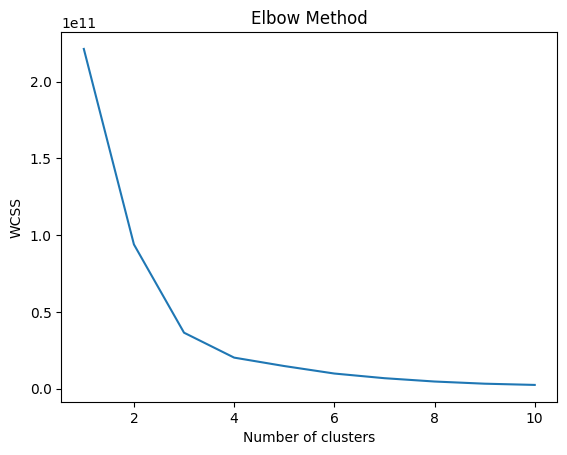

In [32]:
find_elbow(g1_analysis)

The elbow method is a technique used in clustering analysis to determine the optimal number of clusters.When we see an elbow shape in the graph, we pick the K-value where the elbow gets created. We can call this the elbow point.In this case, k=3.

In [33]:
g1_analysis_w_cluster, g1_clusters = set_cluster(g1_analysis, k = 3)

In [34]:
g1_clusters

,count,loudness,energy,valence,danceability,tempo,liveness,key,mode,speechiness,acousticness,instrumentalness
cluster,,,,,,,,,,,,
0,34,-5.974324,0.676353,0.722618,0.723647,121.788088,0.159235,5.588235,0.735294,0.102571,0.187135,0.022373
1,33,-9.583455,0.503212,0.330906,0.525303,122.877515,0.207503,6.515152,0.575758,0.051455,0.343672,0.133654
2,35,-8.569714,0.468029,0.537000,0.714429,106.256029,0.186314,3.857143,0.942857,0.060960,0.532477,0.132695


In [35]:
g1_df_long = pd.melt(g1_analysis_w_cluster, id_vars='cluster', value_vars=['loudness', 'energy', 'valence', 'danceability', 'tempo',
                                                      'liveness', 'key', 'mode', 'speechiness', 'acousticness',
                                                      'instrumentalness'],
                  var_name='feature', value_name='value')


In [36]:
for feature in g1_df_long['feature'].unique():
    model = ols('value ~ C(cluster)', data=g1_df_long[g1_df_long['feature'] == feature]).fit()
    anova_results = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA for {feature}:\n{anova_results}\n')

ANOVA for loudness:
                sum_sq    df          F        PR(>F)
C(cluster)  233.508224   2.0  16.635303  5.908900e-07
Residual    694.826965  99.0        NaN           NaN

ANOVA for energy:
              sum_sq    df          F        PR(>F)
C(cluster)  0.850095   2.0  27.869289  2.505020e-10
Residual    1.509894  99.0        NaN           NaN

ANOVA for valence:
              sum_sq    df          F        PR(>F)
C(cluster)  2.570744   2.0  58.118667  2.016140e-17
Residual    2.189517  99.0        NaN           NaN

ANOVA for danceability:
              sum_sq    df          F        PR(>F)
C(cluster)  0.838761   2.0  30.639279  4.391457e-11
Residual    1.355079  99.0        NaN           NaN

ANOVA for tempo:
                  sum_sq    df         F    PR(>F)
C(cluster)   5955.973613   2.0  4.348283  0.015486
Residual    67801.628142  99.0       NaN       NaN

ANOVA for liveness:
              sum_sq    df         F    PR(>F)
C(cluster)  0.039266   2.0  1.406709  0.249801


#### Group 2 Analysis

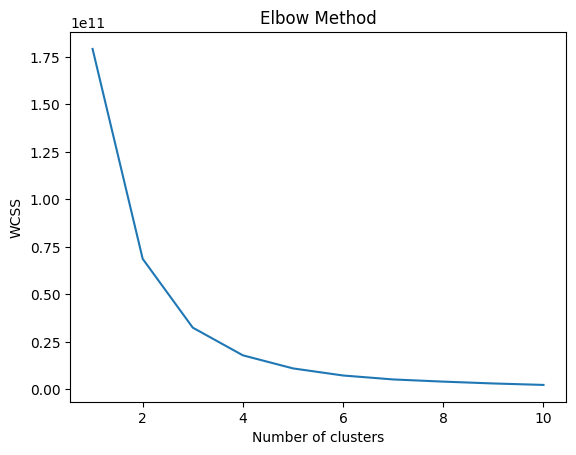

In [37]:
find_elbow(g2_analysis)

In [38]:
g2_analysis_w_cluster, g2_clusters = set_cluster(g2_analysis, k = 3)

In [39]:
g2_clusters

,count,loudness,energy,valence,danceability,tempo,liveness,key,mode,speechiness,acousticness,instrumentalness
cluster,,,,,,,,,,,,
0,49,-6.430939,0.728082,0.632122,0.653449,117.499102,0.229747,5.448980,0.775510,0.061151,0.180855,0.135942
1,27,-10.098481,0.517593,0.605604,0.726037,115.816037,0.134204,4.925926,0.444444,0.040885,0.319020,0.240634
2,23,-8.683261,0.554000,0.302665,0.495217,144.199391,0.199674,4.956522,0.521739,0.050448,0.372132,0.185121


In [40]:
g2_df_long = pd.melt(g2_analysis_w_cluster, id_vars='cluster', value_vars=['loudness', 'energy', 'valence', 'danceability', 'tempo',
                                                      'liveness', 'key', 'mode', 'speechiness', 'acousticness',
                                                      'instrumentalness'],
                  var_name='feature', value_name='value')

In [41]:
for feature in g2_df_long['feature'].unique():
    model = ols('value ~ C(cluster)', data=g2_df_long[g2_df_long['feature'] == feature]).fit()
    anova_results = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA for {feature}:\n{anova_results}\n')

ANOVA for loudness:
                sum_sq    df          F        PR(>F)
C(cluster)  250.065554   2.0  46.396402  7.974771e-15
Residual    258.708566  96.0        NaN           NaN

ANOVA for energy:
              sum_sq    df          F        PR(>F)
C(cluster)  0.945379   2.0  35.611755  2.696169e-12
Residual    1.274248  96.0        NaN           NaN

ANOVA for valence:
              sum_sq    df          F        PR(>F)
C(cluster)  1.820682   2.0  22.489708  9.762148e-09
Residual    3.885900  96.0        NaN           NaN

ANOVA for danceability:
              sum_sq    df          F        PR(>F)
C(cluster)  0.689630   2.0  30.606086  5.220150e-11
Residual    1.081557  96.0        NaN           NaN

ANOVA for tempo:
                  sum_sq    df          F    PR(>F)
C(cluster)  13206.857590   2.0  13.244125  0.000008
Residual    47864.935435  96.0        NaN       NaN

ANOVA for liveness:
              sum_sq    df         F    PR(>F)
C(cluster)  0.159173   2.0  5.464394  0.0056

# Visualization
visualize_results.py

You should create plots, graphs, or charts using Matplotlib or
any other library, to effectively communicate your findings.

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from math import pi
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

### functions:

In [43]:
# creating histogram panels
def audio_histograms(df):
  fig=plt.figure(figsize=(15, 15),layout='constrained')

  for i, var_name in enumerate(df.columns):
    if var_name == "album_release_date" or var_name == "group":
      continue
    ax=fig.add_subplot(5,3,i+1)
    ax.set_title(var_name+" Distribution")
    df[var_name].hist(bins=15,ax=ax)

  #plt.show()

In [44]:
# creating scatterplot panels with popularity score as a histogram
def audio_v_popularity_scatterplot(df):
  fig=plt.figure(figsize=(15, 15),layout='constrained')

  for i, var_name in enumerate(df.columns):
    if var_name == "album_release_date" or var_name == "group":
      continue
    ax=fig.add_subplot(5,3,i+1)
    if var_name == "popularity":
      ax.set_title(var_name+" histogram")
      df[var_name].hist(bins=15,ax=ax)
    else:
      ax.set_title("popularity vs. "+var_name+" scatterplot")
      sns.scatterplot(data=df,x="popularity",y=var_name)

  plt.show()

In [45]:
# creating regression panels with popularity score as a histogram
def audio_v_popularity_regression(df):
  fig_reg=plt.figure(figsize=(15, 15),
                       layout='constrained')

  for i, var_name in enumerate(df.columns):
    if var_name == "album_release_date" or var_name == "group":
      continue
    ax=fig_reg.add_subplot(5,3,i+1)
    if var_name == "popularity":
      ax.set_title(var_name+" histogram")
      df[var_name].hist(bins=15,ax=ax)
    else:
      ax.set_title("popularity vs. "+var_name+" regression line")
      sns.regplot(data=df, x="popularity",y=var_name)


  plt.show()

In [46]:
# creating heatmap
def create_heatmap(df):
  f, ax = plt.subplots(figsize=(16, 8))
  ignore_columns = ['album_release_date','group']
  sns.heatmap(df[[col for col in df.columns if col not in ignore_columns]].corr(), annot=True, fmt=".2f", ax=ax, cmap='coolwarm')
  plt.title("Audio Feature Correlation Heatmap")
  plt.show()

## Group 1:

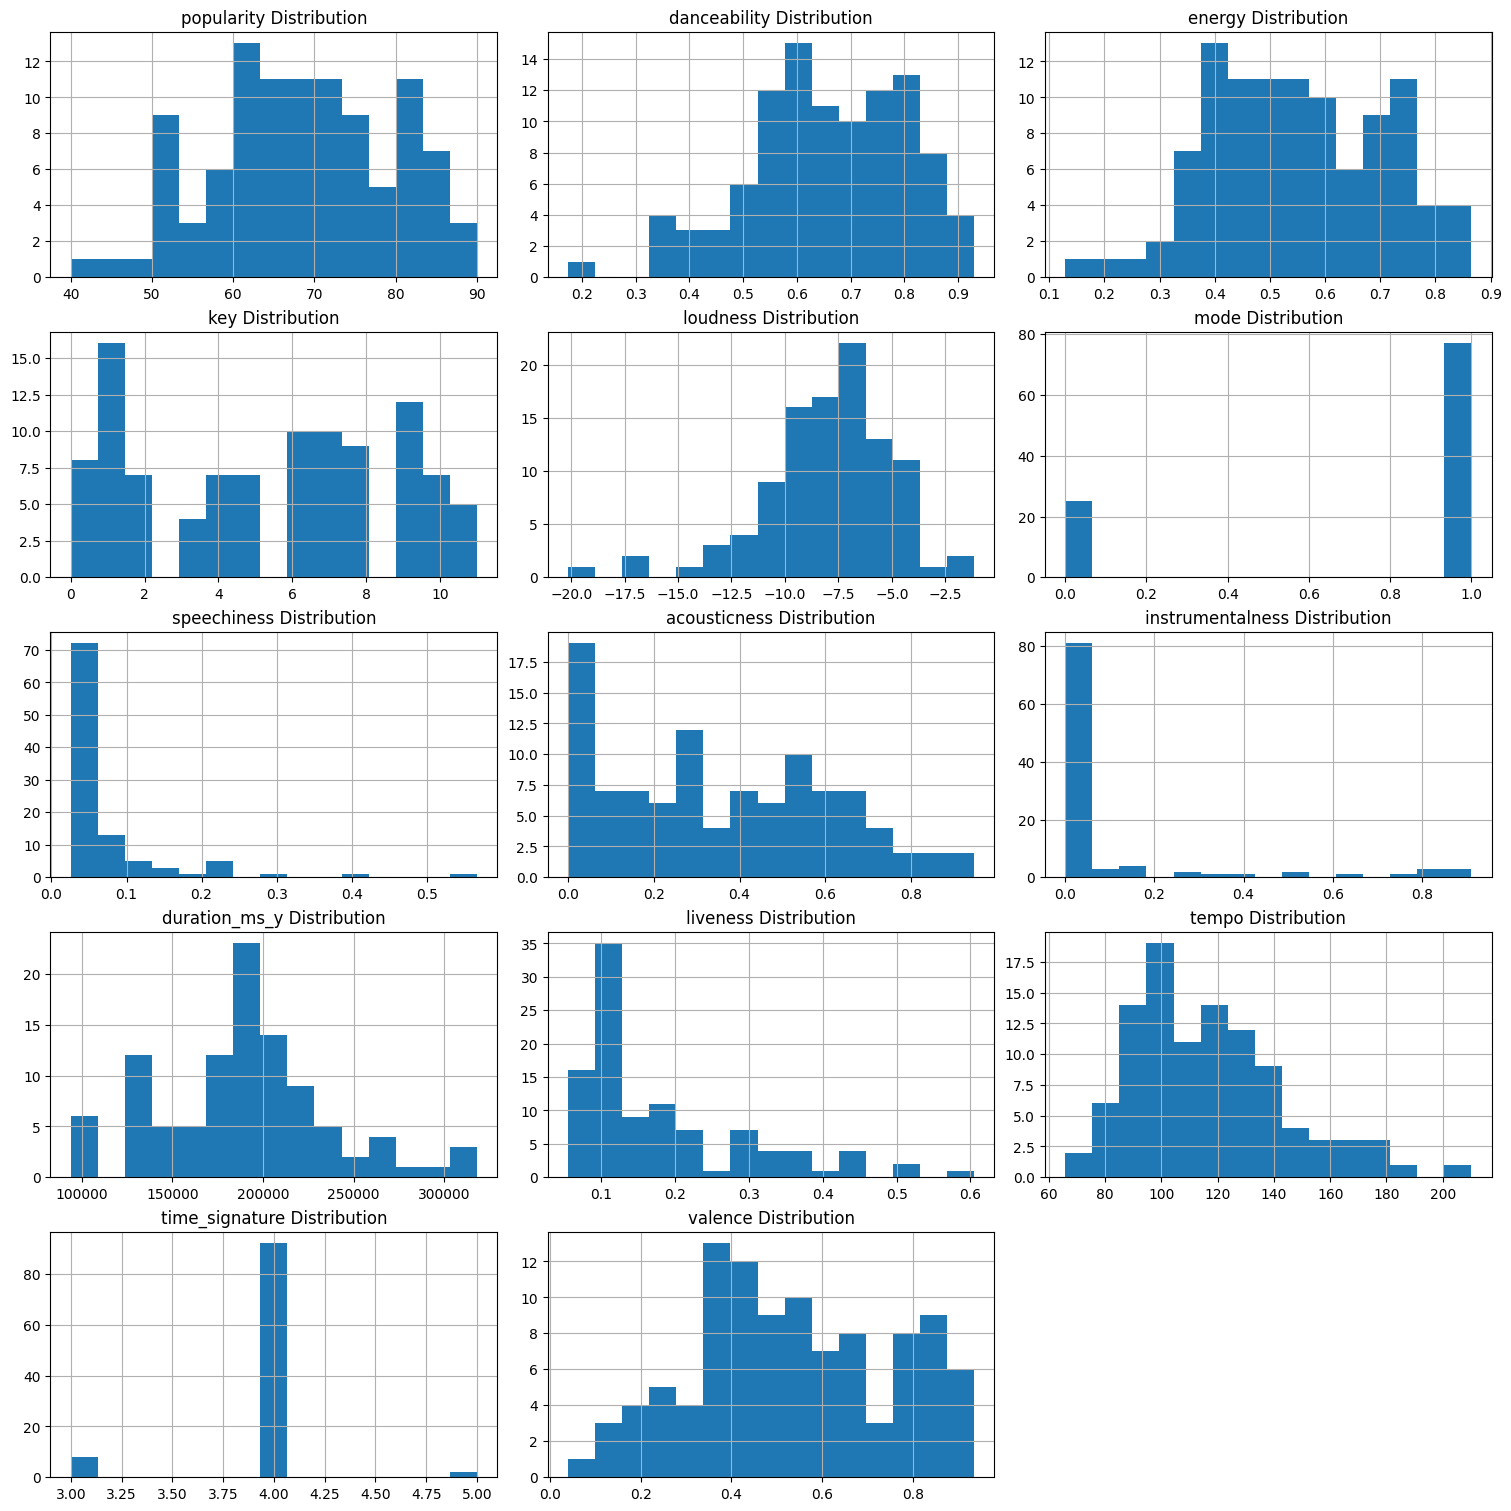

In [47]:
audio_histograms(g1_analysis)

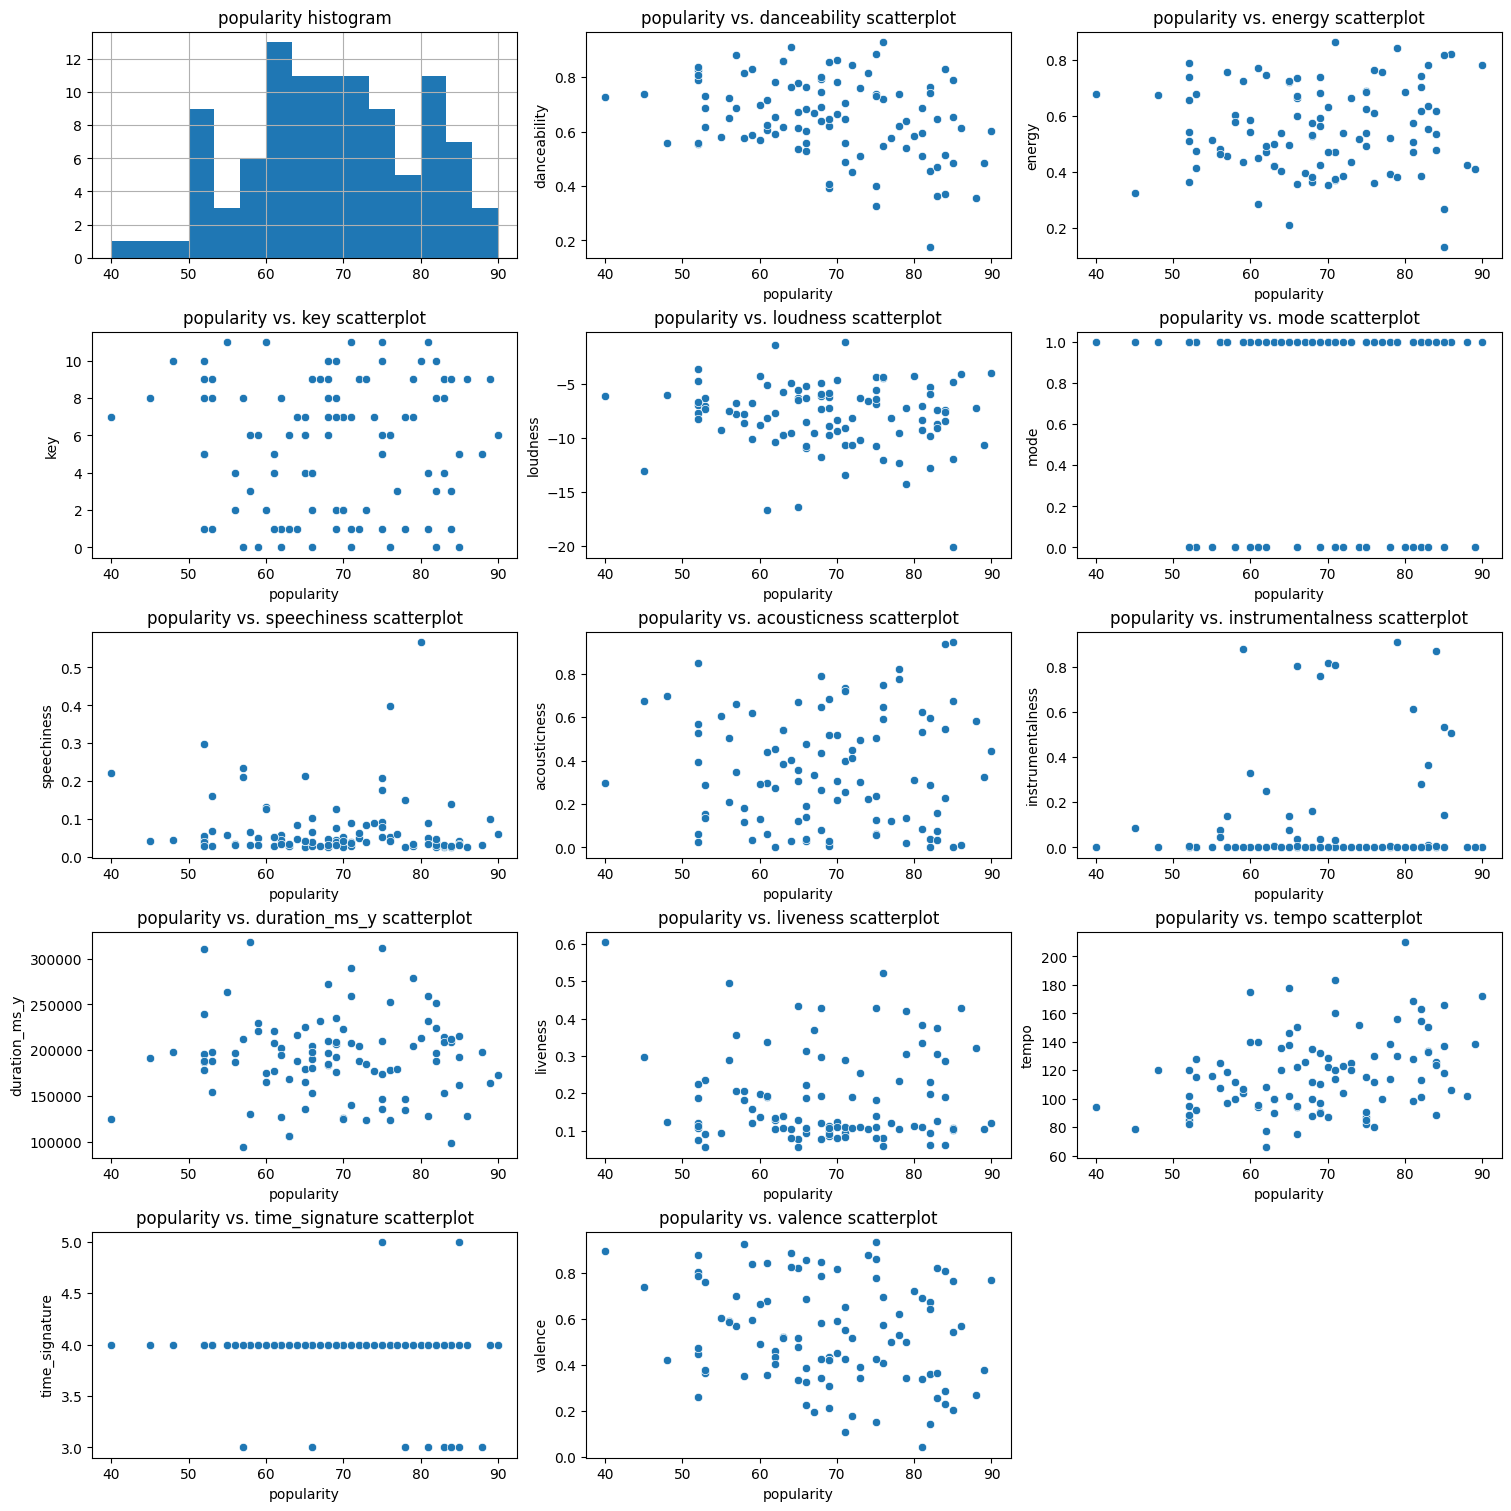

In [48]:
audio_v_popularity_scatterplot(g1_analysis)

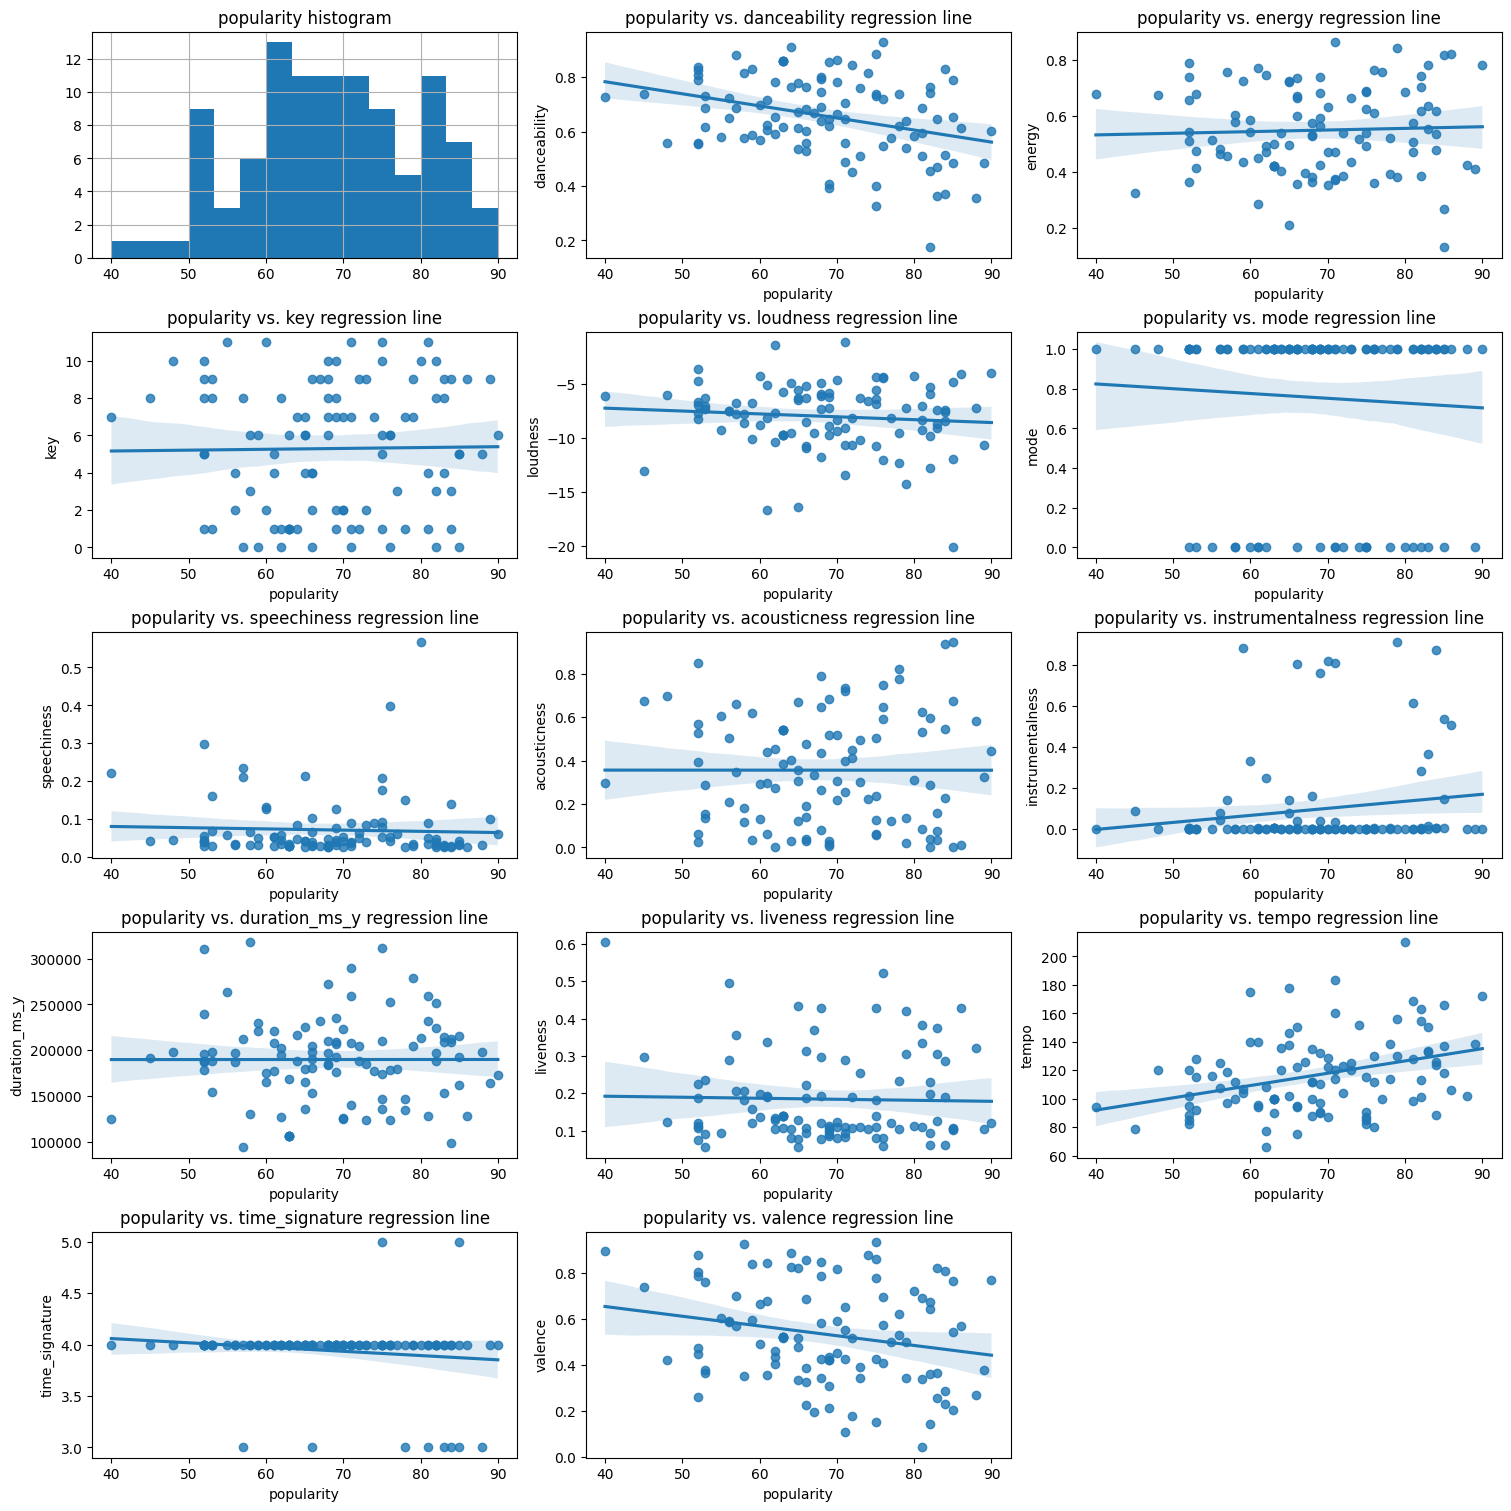

In [92]:
audio_v_popularity_regression(g1_analysis)

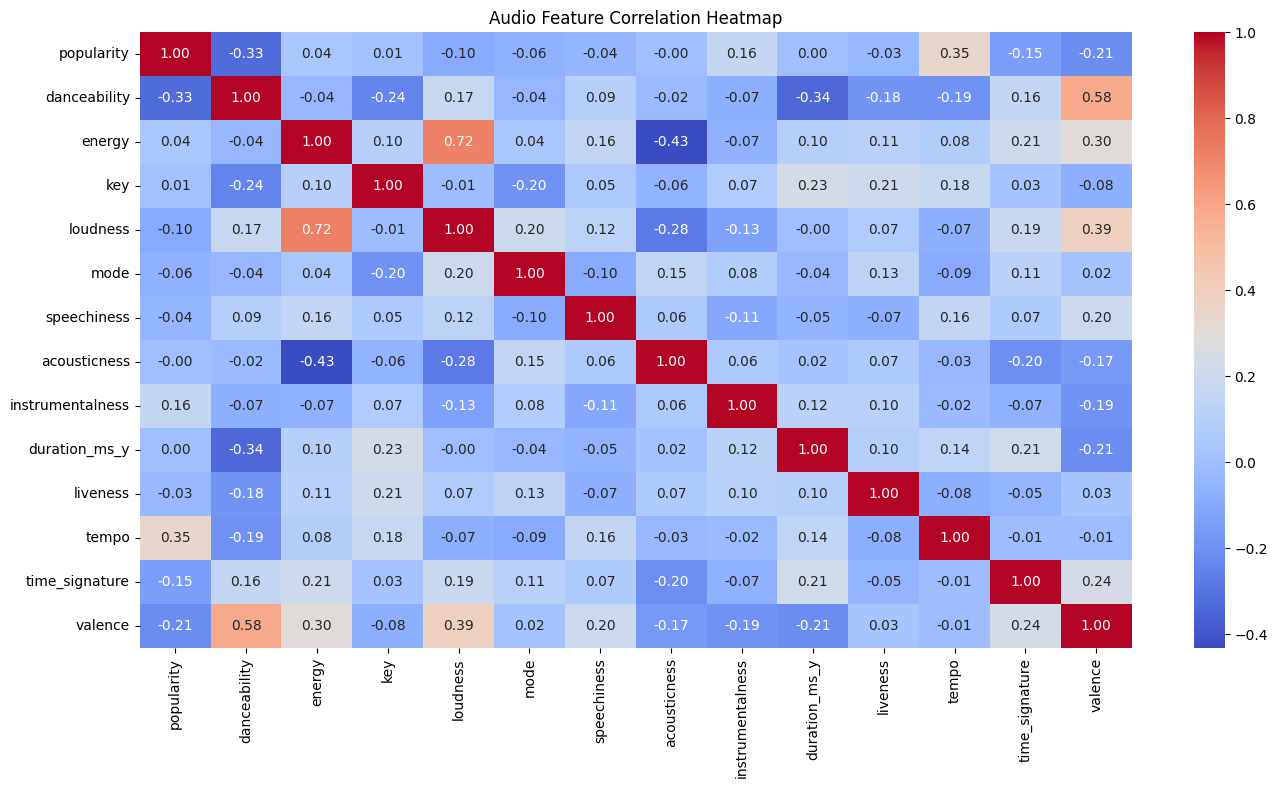

In [49]:
create_heatmap(g1_analysis)

#### radar chart for clusters
please run this code after the clustering analysis section in `Analysis`.

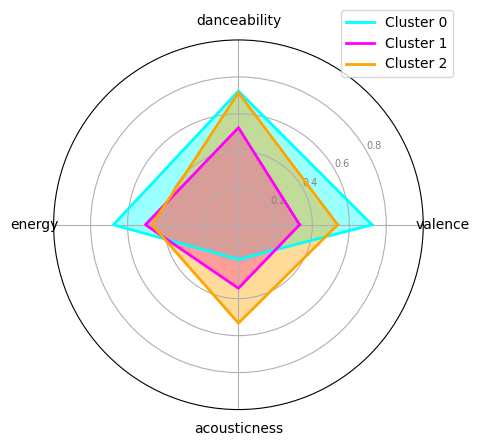

In [50]:
#radar charts showing 3 clusters of group 1
g1_clusters_selected = g1_clusters[['valence','danceability','energy','acousticness']]

num_vars = len(g1_clusters_selected.columns)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], g1_clusters_selected.columns)
ax.set_rlabel_position(30)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
plt.ylim(0, 1)
colors = ['cyan', 'magenta','orange']

for i, row in enumerate(g1_clusters_selected.iterrows()):
    stats = row[1].tolist() + row[1].tolist()[:1]
    ax.plot(angles, stats, color=colors[i % len(colors)], linewidth=2, linestyle='solid', label=f'Cluster {row[0]}')
    ax.fill(angles, stats, color=colors[i % len(colors)], alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

## Group 2

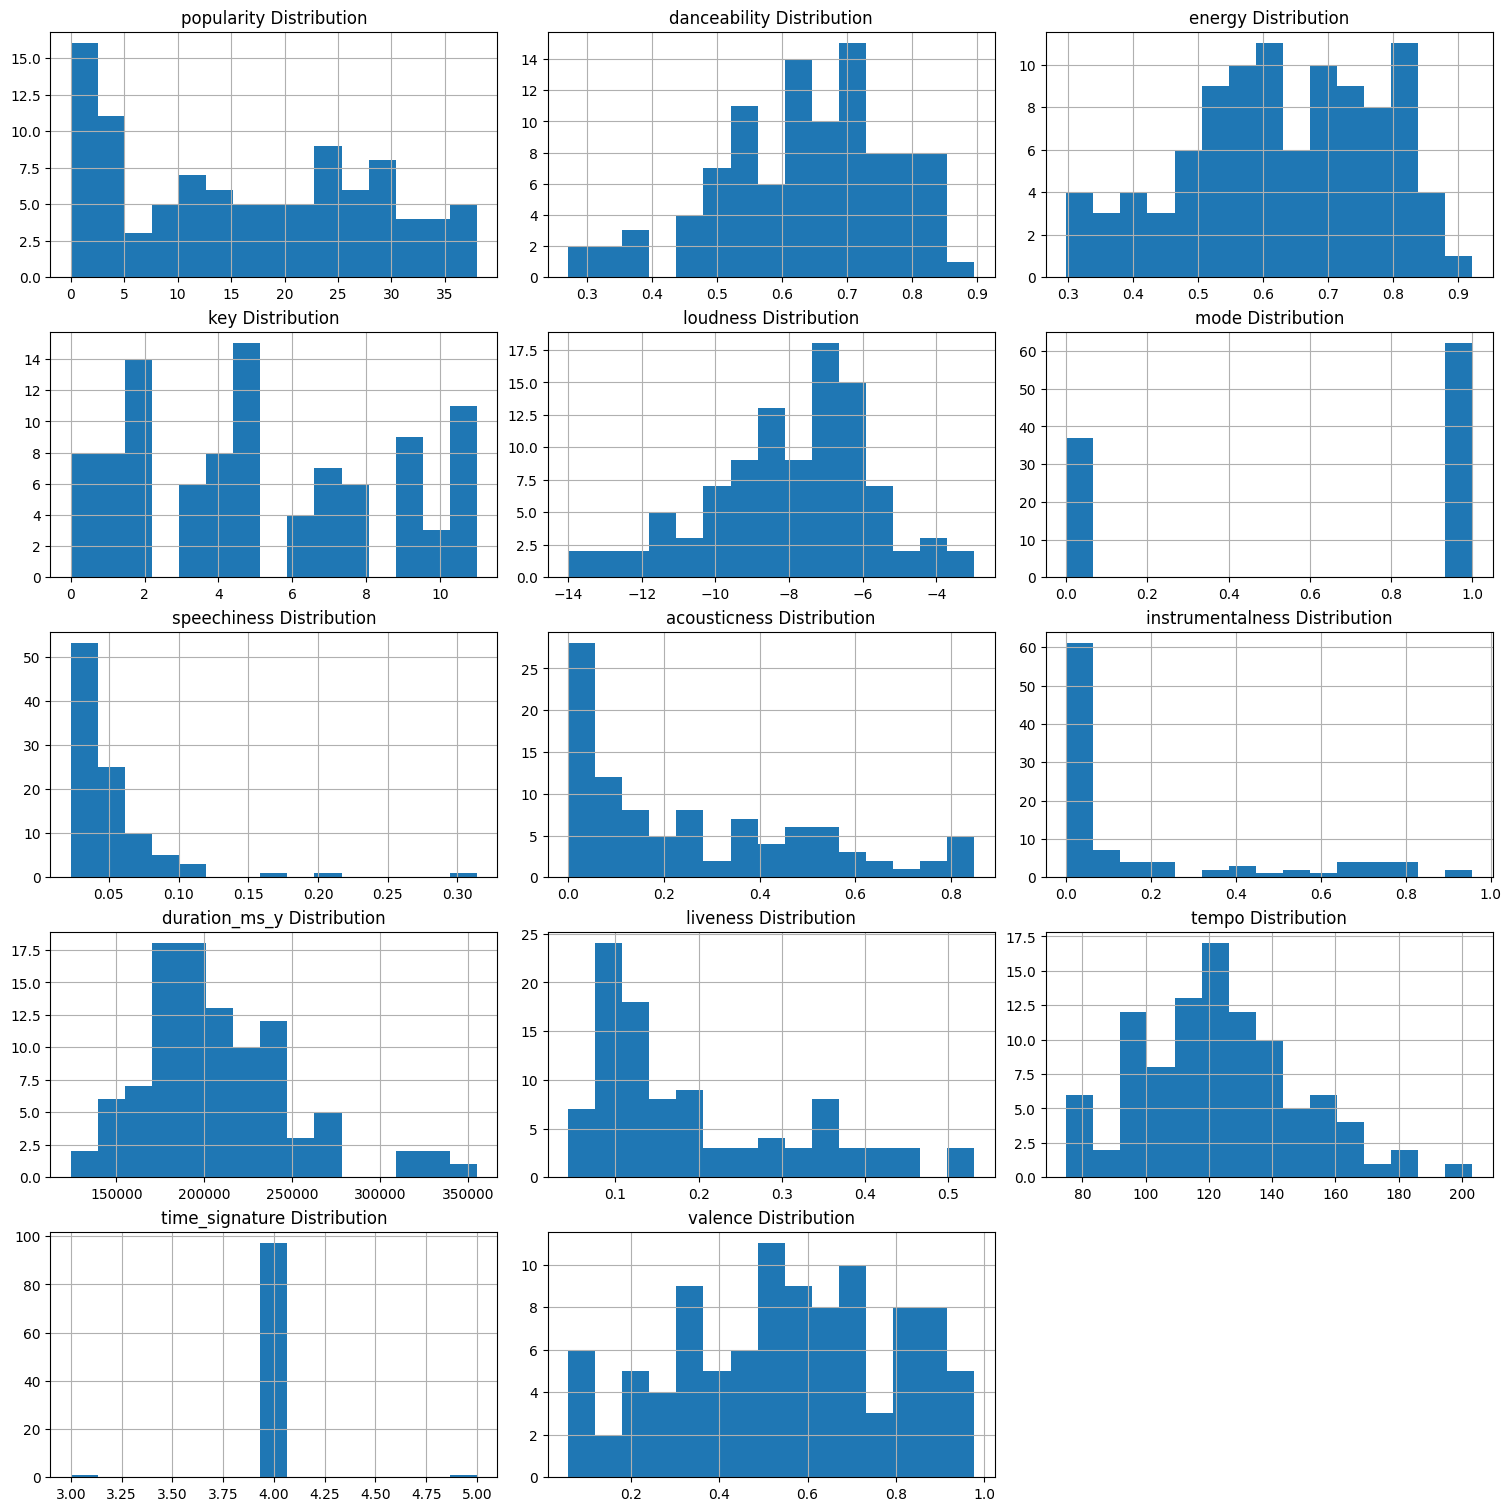

In [51]:
audio_histograms(g2_analysis)

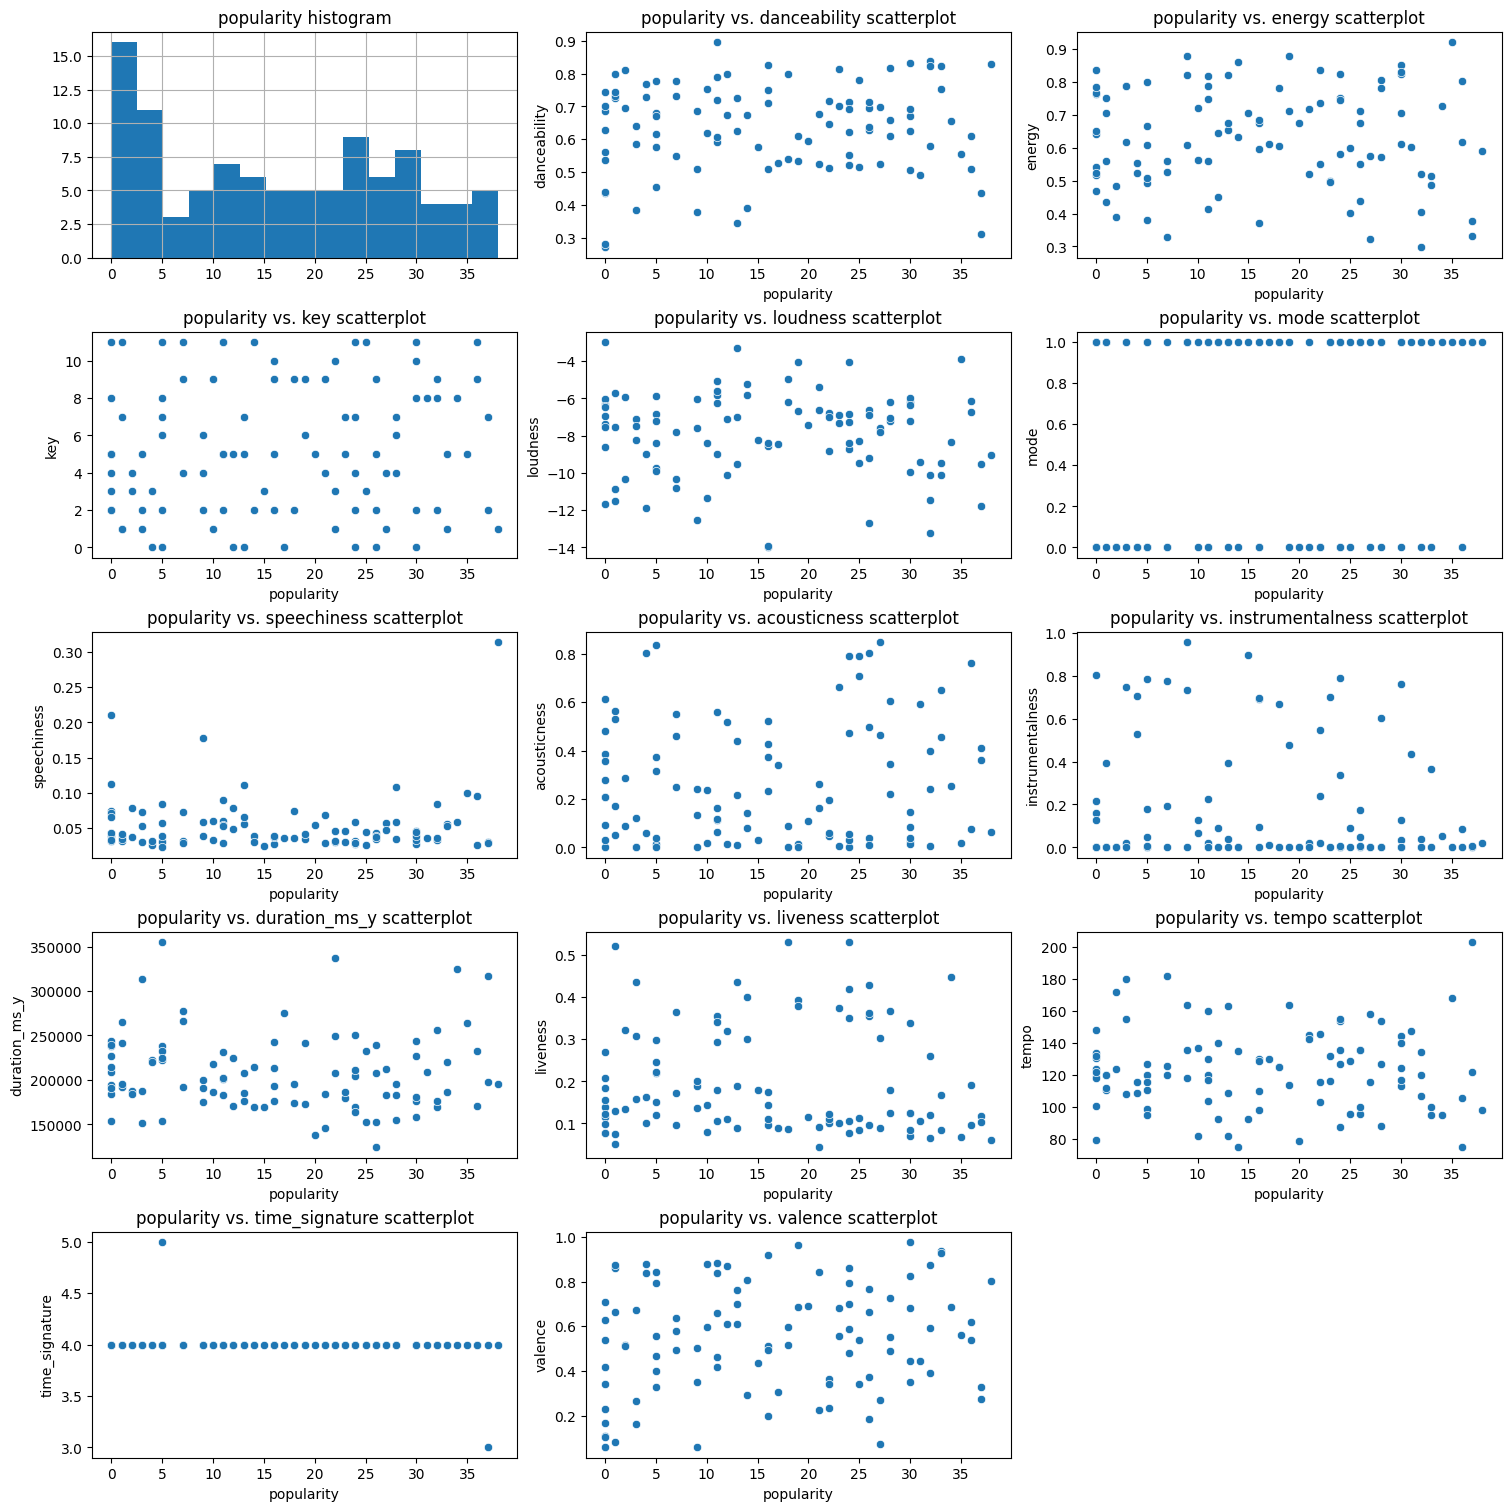

In [52]:
audio_v_popularity_scatterplot(g2_analysis)

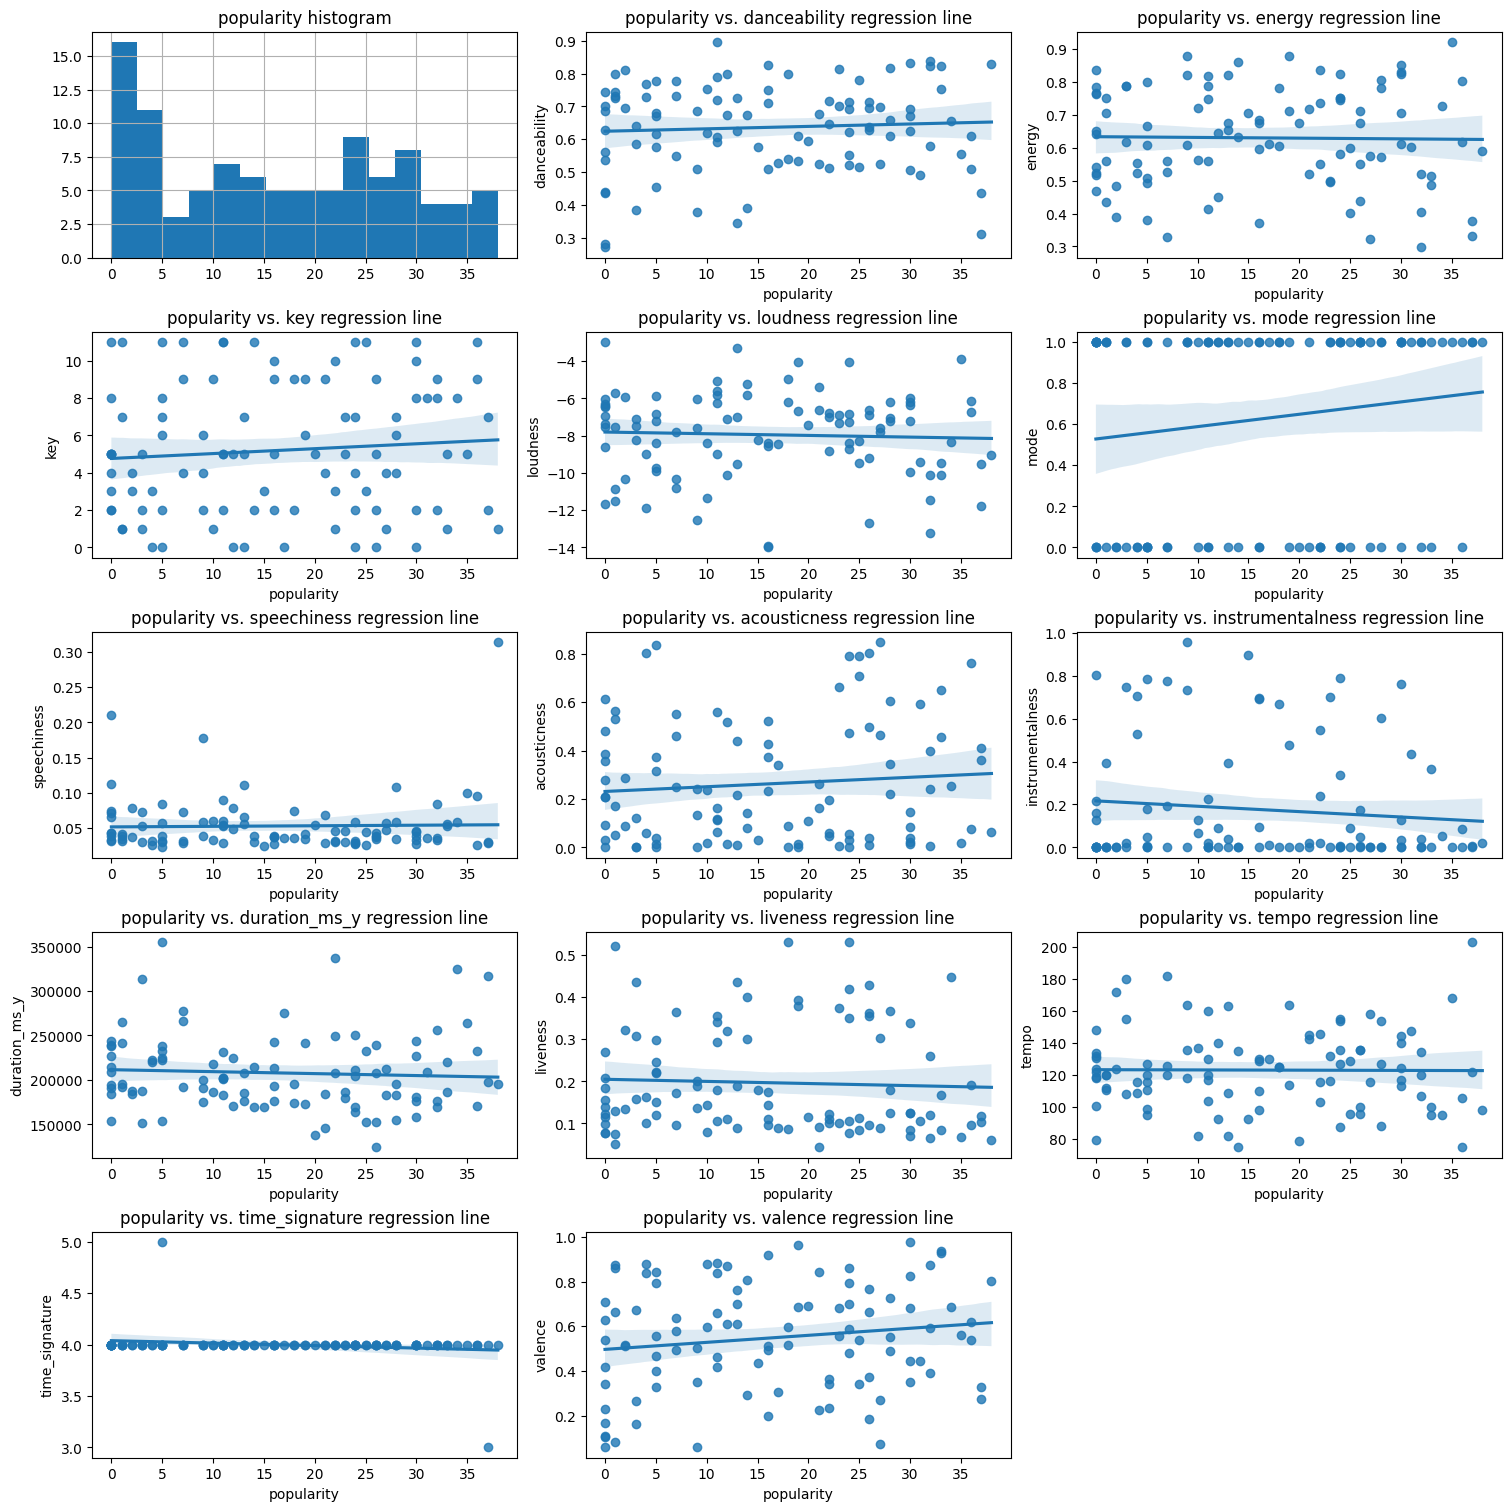

In [97]:
audio_v_popularity_regression(g2_analysis)

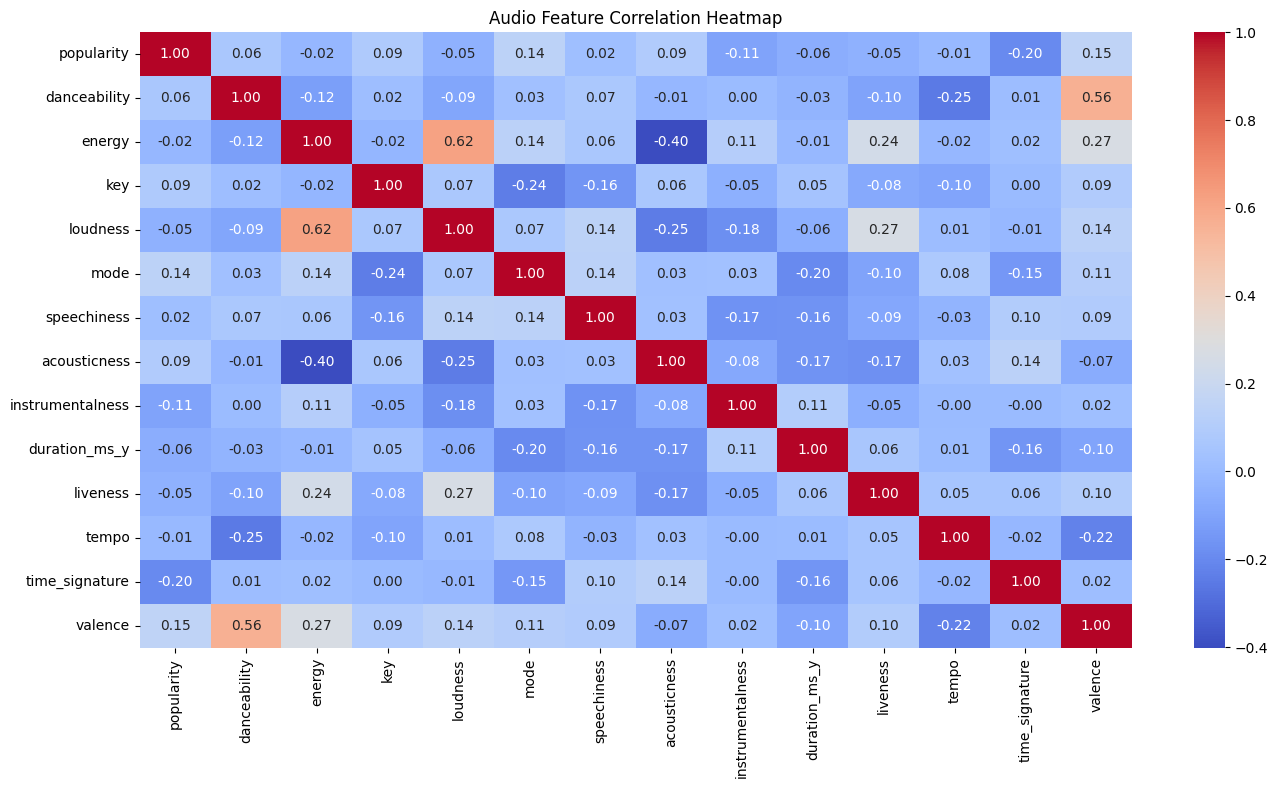

In [53]:
create_heatmap(g2_analysis)